# Import

In [1]:
import numpy as np
print(f'numpy version = {np.__version__}')

import tensorflow as tf
print(f'tensorflow version = {tf.__version__}')

numpy version = 1.22.4
tensorflow version = 2.6.0


In [2]:
import os
import cv2
import csv
import sys
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from scipy import stats

# Global Variables

In [4]:
n_FOLD = 5
n_SUBTASK = 4

# remove_dementia_pid_list = [22, 33, 57, 58, 64, 66, 67]
# remove_dementia_pid_list_str = ['22', '33', '57', '58', '64', '66', '67']

# Subjects ID

In [21]:
### MMSE
# df_walk = pd.read_csv("Results/Walking_PreTrained_MMSE.csv")
# df_sitstand = pd.read_csv("Results/SitStand_PreTrained_MMSE.csv")
# df_turn = pd.read_csv("Results/Turning_MMSE.csv")
# df_facial = pd.read_csv("Results/Facial_PreTrained_MMSE.csv")

### CDR
# df_walk = pd.read_csv("Results/Walking_PreTrained_CDR.csv")
# df_sitstand = pd.read_csv("Results/SitStand_PreTrained_CDR.csv")
# df_turn = pd.read_csv("Results/Turning_CDR.csv")
# df_facial = pd.read_csv("Results/Facial_PreTrained_CDR.csv")

### CDR-SOB
df_walk = pd.read_csv("Results/Walking_PreTrained_CDRSOB.csv")
df_sitstand = pd.read_csv("Results/SitStand_PreTrained_CDRSOB.csv")
df_turn = pd.read_csv("Results/Turning_CDRSOB.csv")
df_facial = pd.read_csv("Results/Facial_PreTrained_CDRSOB.csv")


# df_walk = pd.read_csv("Results/Walking_MMSE.csv")
# df_sitstand = pd.read_csv("Results/SitStand_MMSE.csv")
# df_turn = pd.read_csv("Results/Turning_MMSE.csv")
# df_facial = pd.read_csv("Results/Facial_MMSE.csv")

# df_walk = pd.read_csv("Results/Walking_CDR.csv")
# df_sitstand = pd.read_csv("Results/SitStand_CDR.csv")
# df_turn = pd.read_csv("Results/Turning_CDR.csv")
# df_facial = pd.read_csv("Results/Facial_CDR.csv")

# df_walk = pd.read_csv("Results/Walking_CDRSOB.csv")
# df_sitstand = pd.read_csv("Results/SitStand_CDRSOB.csv")
# df_turn = pd.read_csv("Results/Turning_CDRSOB.csv")
# df_facial = pd.read_csv("Results/Facial_CDRSOB.csv")

# df_walk = pd.read_csv("Results/Walking_PreTrained_CDRSOB.csv")
# df_sitstand = pd.read_csv("Results/SitStand_PreTrained_CDRSOB.csv")
# df_turn = pd.read_csv("Results/Turning_CDR.csv")
# df_facial = pd.read_csv("Results/Facial_PreTrained_CDRSOB.csv")

In [22]:
all_pid_list = []
all_pid_list_based = []
walk_pid_list, sitstand_pid_list, turn_pid_list, facial_pid_list = [], [], [], []


def get_all_pid(walk, sitstand, facial, turn):
    tmp_list = []
    
    for i in range(walk.shape[0]):
        pid = walk.loc[i, 'Pid']
        tmp_list.append(pid)
    for i in range(sitstand.shape[0]):
        pid = sitstand.loc[i, 'Pid']
        if (pid in tmp_list) == False:
            tmp_list.append(pid)
            # print(f'[add pid: Sit&Stand] pid: {pid}')
    for i in range(facial.shape[0]):
        pid = facial.loc[i, 'Pid']
        if (pid in tmp_list) == False:
            tmp_list.append(pid)
            # print(f'[add pid: Facial] pid: {pid}')
    for i in range(turn.shape[0]):
        pid = turn.loc[i, 'Pid']
        if (pid in tmp_list) == False:
            tmp_list.append(pid)
            # print(f'[add pid: Turning] pid: {pid}')
    return tmp_list

def get_all_pid_based(walk, sitstand, facial, turn, pidList):
    tmp_list = []
    pid_walk, pid_sitstand, pid_turn, pid_facial = [], [], [], []
    
    for i in range(walk.shape[0]): pid_walk.append(walk.loc[i, 'Pid'])
    for i in range(sitstand.shape[0]): pid_sitstand.append(sitstand.loc[i, 'Pid'])
    for i in range(turn.shape[0]): pid_turn.append(turn.loc[i, 'Pid'])
    for i in range(facial.shape[0]): pid_facial.append(facial.loc[i, 'Pid'])

    for pid in pidList:
        if (pid in pid_walk) and (pid in pid_sitstand) and (pid in pid_turn) and (pid in pid_facial):
            tmp_list.append(pid)
    return tmp_list, pid_walk, pid_sitstand, pid_turn, pid_facial


all_pid_list = get_all_pid(df_walk, df_sitstand, df_facial, df_turn)
all_pid_list_based, walk_pid_list, sitstand_pid_list, turn_pid_list, facial_pid_list = get_all_pid_based(df_walk, df_sitstand, df_facial, df_turn, all_pid_list)

In [23]:
print(f'# of valid pid: {len(all_pid_list)} subjects.')
print(all_pid_list)
print(f'\n# of valid pid (based): {len(all_pid_list_based)} subjects.')
print(all_pid_list_based)

print(f'\n# of subjects in 【Walking】 Subtask: {len(walk_pid_list)} subjects.')
print(walk_pid_list)
print(f'\n# of subjects in 【SitStand】 Subtask: {len(sitstand_pid_list)} subjects.')
print(sitstand_pid_list)
print(f'\n# of subjects in 【Turning】 Subtask: {len(turn_pid_list)} subjects.')
print(turn_pid_list)
print(f'\n# of subjects in 【Facial】 Subtask: {len(facial_pid_list)} subjects.')
print(facial_pid_list)

# of valid pid: 99 subjects.
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 8, 14, 15, 23, 42, 47, 50, 53, 54, 55, 56]

# of valid pid (based): 81 subjects.
[1, 2, 3, 5, 6, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 57, 58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

# of subjects in 【Walking】 Subtask: 88 subjects.
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 48, 49, 51, 52, 57, 

# CSV to Dict

In [24]:
walk_dict = {}
sitstand_dict = {}
turn_dict = {}
facial_dict = {}

def creat_prediction_result_dict(df):
    tmp_dict = {}
    for row_idx in range(df.shape[0]):
        pid = df.loc[row_idx, "Pid"]
        pred = df.loc[row_idx, "Prediction"]
        truth = df.loc[row_idx, "Ground_Truth"]
        label = df.loc[row_idx, "Label"]
        tmp_dict[pid] = {}
        tmp_dict[pid]['prediction'] = pred
        tmp_dict[pid]['ground_truth'] = truth
        tmp_dict[pid]['label'] = label
    return tmp_dict

walk_dict = creat_prediction_result_dict(df_walk)
sitstand_dict = creat_prediction_result_dict(df_sitstand)
turn_dict = creat_prediction_result_dict(df_turn)
facial_dict = creat_prediction_result_dict(df_facial)

walk_dict[1]

{'prediction': 0.78959316, 'ground_truth': 0.0, 'label': 0}

# Prediction Score (MMSE)

In [9]:
MMSE_combined_prediction_dict = {}

MMSE_combined_label = []
MMSE_combined_prediction = []
MMSE_combined_truth = []

def get_MMSE_combined_prediction_result(pidList, walk, sitstand, turn, facial):
    tmp_result = {}
    for pid in pidList:
        score = 0
        n_subtask = 0
        
        if pid in walk:
            n_subtask += 1
            score += walk[pid]['prediction']
            label = walk[pid]['label']
            ground_truth = walk[pid]['ground_truth']
        if pid in sitstand:
            n_subtask += 1
            score += sitstand[pid]['prediction']
            label = sitstand[pid]['label']
            ground_truth = sitstand[pid]['ground_truth']
        if pid in turn:
            n_subtask += 1
            score += turn[pid]['prediction']
            label = turn[pid]['label']
            ground_truth = turn[pid]['ground_truth']
        if pid in facial:
            n_subtask += 1
            score += facial[pid]['prediction']
            label = facial[pid]['label']
            ground_truth = facial[pid]['ground_truth']

        combined_score = round(score/n_subtask, 2)
        tmp_result[pid] = {}
        tmp_result[pid]['prediction'] = combined_score
        tmp_result[pid]['ground_truth'] = ground_truth
        tmp_result[pid]['label'] = label

        MMSE_combined_label.append("AD" if label==1 else "Non-AD")
        MMSE_combined_prediction.append(combined_score)
        MMSE_combined_truth.append(ground_truth)
    return tmp_result

MMSE_combined_prediction_dict = get_MMSE_combined_prediction_result(all_pid_list, walk_dict, sitstand_dict, turn_dict, facial_dict)
MMSE_combined_prediction_dict[1]

{'prediction': 22.52, 'ground_truth': 30, 'label': 0}

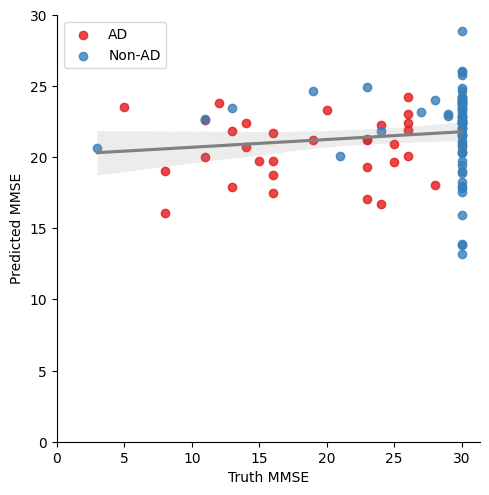

In [10]:
result_df = pd.DataFrame()
result_df['Label'] = MMSE_combined_label
result_df['Truth MMSE'] = MMSE_combined_truth
result_df['Predicted MMSE'] = MMSE_combined_prediction

slope, intercept, r_value, p_value, std_err = stats.linregress(result_df['Truth MMSE'], result_df['Predicted MMSE'])

hue_order = ['AD', 'Non-AD']
sns.lmplot(data=result_df, x="Truth MMSE", y="Predicted MMSE", hue="Label", hue_order=hue_order, fit_reg=False, legend=False, palette="Set1")
ax = sns.regplot(data=result_df, x="Truth MMSE", y="Predicted MMSE", scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax.legend()

# Prediction Score (CDR)

In [19]:
CDR_combined_prediction_dict = {}

CDR_combined_label = []
CDR_combined_prediction = []
CDR_combined_truth = []

def get_CDR_combined_prediction_result(pidList, walk, sitstand, turn, facial):
    tmp_result = {}
    for pid in pidList:
        score = 0
        n_subtask = 0
        
        if pid in walk:
            n_subtask += 1
            score += walk[pid]['prediction']
            label = walk[pid]['label']
            ground_truth = walk[pid]['ground_truth']
        if pid in sitstand:
            n_subtask += 1
            score += sitstand[pid]['prediction']
            label = sitstand[pid]['label']
            ground_truth = sitstand[pid]['ground_truth']
        if pid in turn:
            n_subtask += 1
            score += turn[pid]['prediction']
            label = turn[pid]['label']
            ground_truth = turn[pid]['ground_truth']
        if pid in facial:
            n_subtask += 1
            score += facial[pid]['prediction']
            label = facial[pid]['label']
            ground_truth = facial[pid]['ground_truth']

        combined_score = round(score/n_subtask, 2)
        tmp_result[pid] = {}
        tmp_result[pid]['prediction'] = combined_score
        tmp_result[pid]['ground_truth'] = ground_truth
        tmp_result[pid]['label'] = label

        CDR_combined_label.append("AD" if label==1 else "Non-AD")
        CDR_combined_prediction.append(combined_score)
        CDR_combined_truth.append(ground_truth)
    return tmp_result


CDR_combined_prediction_dict = get_CDR_combined_prediction_result(all_pid_list, walk_dict, sitstand_dict, turn_dict, facial_dict)
CDR_combined_prediction_dict[1]

{'prediction': 0.24, 'ground_truth': 0.0, 'label': 0}

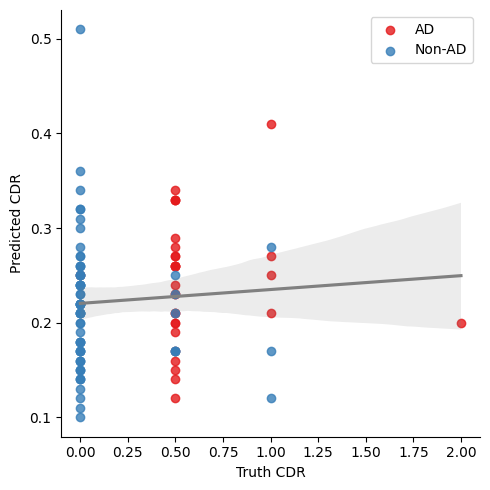

In [20]:
result_df = pd.DataFrame()
result_df['Label'] = CDR_combined_label
result_df['Truth CDR'] = CDR_combined_truth
result_df['Predicted CDR'] = CDR_combined_prediction

slope, intercept, r_value, p_value, std_err = stats.linregress(result_df['Truth CDR'], result_df['Predicted CDR'])

hue_order = ['AD', 'Non-AD']
sns.lmplot(data=result_df, x="Truth CDR", y="Predicted CDR", hue="Label", hue_order=hue_order, fit_reg=False, legend=False, palette="Set1")
ax = sns.regplot(data=result_df, x="Truth CDR", y="Predicted CDR", scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})
# ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
# ax.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax.legend()

# Prediction Score (CDRSOB)

In [25]:
CDRSOB_combined_prediction_dict = {}

CDRSOB_combined_label = []
CDRSOB_combined_prediction = []
CDRSOB_combined_truth = []

def get_CDRSOB_combined_prediction_result(pidList, walk, sitstand, turn, facial):
    tmp_result = {}
    for pid in pidList:
        score = 0
        n_subtask = 0
        
        if pid in walk:
            n_subtask += 1
            score += walk[pid]['prediction']
            label = walk[pid]['label']
            ground_truth = walk[pid]['ground_truth']
        if pid in sitstand:
            n_subtask += 1
            score += sitstand[pid]['prediction']
            label = sitstand[pid]['label']
            ground_truth = sitstand[pid]['ground_truth']
        if pid in turn:
            n_subtask += 1
            score += turn[pid]['prediction']
            label = turn[pid]['label']
            ground_truth = turn[pid]['ground_truth']
        if pid in facial:
            n_subtask += 1
            score += facial[pid]['prediction']
            label = facial[pid]['label']
            ground_truth = facial[pid]['ground_truth']

        combined_score = score/n_subtask
        tmp_result[pid] = {}
        tmp_result[pid]['prediction'] = combined_score
        tmp_result[pid]['ground_truth'] = ground_truth
        tmp_result[pid]['label'] = label

        if combined_score>0.8: print(f'[Outliner?] pid={pid}, value={combined_score}')

        CDRSOB_combined_label.append("AD" if label==1 else "Non-AD")
        CDRSOB_combined_prediction.append(combined_score)
        CDRSOB_combined_truth.append(ground_truth)
    return tmp_result


CDRSOB_combined_prediction_dict = get_CDRSOB_combined_prediction_result(all_pid_list, walk_dict, sitstand_dict, turn_dict, facial_dict)
CDRSOB_combined_prediction_dict[1]

[Outliner?] pid=2, value=0.909883023767272
[Outliner?] pid=5, value=0.8496482614450722
[Outliner?] pid=11, value=0.9111491684612113
[Outliner?] pid=13, value=0.8887711620754736
[Outliner?] pid=16, value=0.8156914302353193
[Outliner?] pid=18, value=0.8842054792213748
[Outliner?] pid=25, value=0.8637297111009488
[Outliner?] pid=26, value=0.8181743184262888
[Outliner?] pid=27, value=0.8406416227680236
[Outliner?] pid=28, value=0.9681671518577697
[Outliner?] pid=33, value=0.9673890906920778
[Outliner?] pid=36, value=1.0657314297743528
[Outliner?] pid=39, value=0.811461817666874
[Outliner?] pid=45, value=0.8127861770685283
[Outliner?] pid=48, value=0.9521235576025205
[Outliner?] pid=49, value=0.885652118438496
[Outliner?] pid=51, value=0.9589563772006502
[Outliner?] pid=52, value=0.9984130046461044
[Outliner?] pid=59, value=0.8161022683330135
[Outliner?] pid=60, value=0.8455120026580047
[Outliner?] pid=68, value=1.5221281041777641
[Outliner?] pid=69, value=0.8174508426102605
[Outliner?] pid

{'prediction': 0.7658941863770654, 'ground_truth': 0.0, 'label': 0}

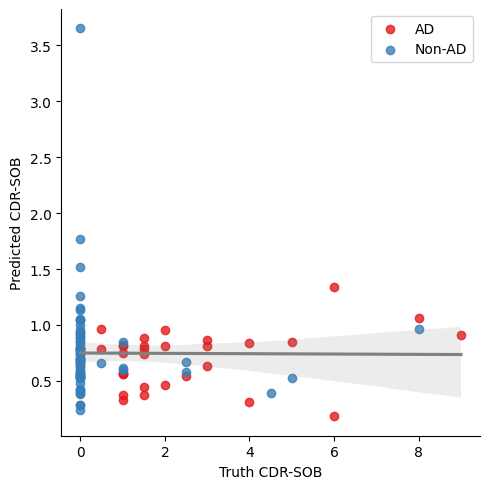

In [26]:
result_df = pd.DataFrame()
result_df['Label'] = CDRSOB_combined_label
result_df['Truth CDR-SOB'] = CDRSOB_combined_truth
result_df['Predicted CDR-SOB'] = CDRSOB_combined_prediction

slope, intercept, r_value, p_value, std_err = stats.linregress(result_df['Truth CDR-SOB'], result_df['Predicted CDR-SOB'])

hue_order = ['AD', 'Non-AD']
sns.lmplot(data=result_df, x="Truth CDR-SOB", y="Predicted CDR-SOB", hue="Label", hue_order=hue_order, fit_reg=False, legend=False, palette="Set1")
ax = sns.regplot(data=result_df, x="Truth CDR-SOB", y="Predicted CDR-SOB", scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})
# ax.set_xticks([0, 2, 4, 6, 8])
# ax.set_yticks([0, 2, 4, 6, 8]) 
ax.legend()